In [ ]:
# input.columns[input.isna().any()] - checks for naN values in the entire dataset not only the column
# predict_proba
# inplace

🌟 Types of Naive Bayes 

Naive Bayes is based on probability and works on the naive assumption that features are independent.

P(y∣X)= P(X)P(X∣y)/P(y)

​
![image.png](image(1).png)


There are 3 main types you should remember 👇

1️⃣ Gaussian Naive Bayes

🔹 Used for:

Continuous (numeric) data

🔹 Example data:

Height

Weight

Age

Salary

Temperature

🔹 Simple explanation:

It assumes the data follows a normal (bell-shaped) distribution.

🔹 Example:

Height = 170.5
Age = 25

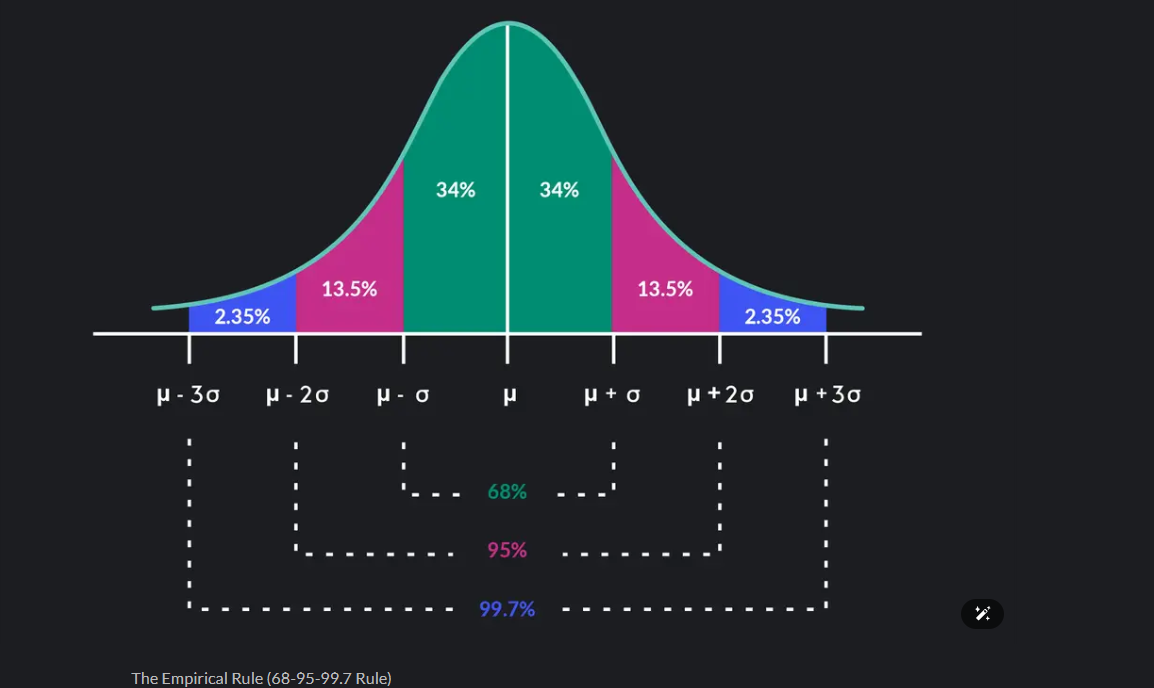
🔹 In sklearn:

from sklearn.naive_bayes import GaussianNB

2️⃣ Multinomial Naive Bayes

🔹 Used for:

Count-based data

🔹 Example data:

Word counts

Number of times a word appears

Frequency data

🔹 Simple explanation:

It works with counts, not real values.

🔹 Example:
"free" → 3 times
"offer" → 1 time

🔹 Real-world use:

Spam detection

Text classification

Document categorization

🔹 In sklearn:
from sklearn.naive_bayes import MultinomialNB

3️⃣ Bernoulli Naive Bayes

🔹 Used for:

Binary (yes/no, 0/1) data

🔹 Example data:

Word present or not

True / False

0 / 1 features

🔹 Simple explanation:

It checks whether a feature exists or not.

🔹 Example:

Word "win" → present (1)
Word "hello" → absent (0)

🔹 Real-world use:

Spam filtering

Click prediction

🔹 In sklearn:
from sklearn.naive_bayes import BernoulliNB

🧠 Quick Comparison Table (Easy to Remember)
| Type           | Data Type  | Example        |
| -------------- | ---------- | -------------- |
| Gaussian NB    | Continuous | Age, height    |
| Multinomial NB | Counts     | Word frequency |
| Bernoulli NB   | Binary     | Yes / No       |


In [73]:
import pandas as pd

In [74]:
df=pd.read_csv("titanic.csv")
df.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [75]:
# removed irrelevant features
input=df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Embarked','Cabin','Survived'],axis='columns')
target=df.Survived

In [76]:
dummies=pd.get_dummies(input['Sex'],dtype=int)
dummies

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [77]:
input=pd.concat([input,dummies],axis='columns')
input

,Pclass,Sex,Age,Fare,female,male
0,3,male,22.0,7.2500,0,1
1,1,female,38.0,71.2833,1,0
2,3,female,26.0,7.9250,1,0
3,1,female,35.0,53.1000,1,0
4,3,male,35.0,8.0500,0,1
...,...,...,...,...,...,...
886,2,male,27.0,13.0000,0,1
887,1,female,19.0,30.0000,1,0
888,3,female,NaN,23.4500,1,0
889,1,male,26.0,30.0000,0,1


In [86]:
input.drop('Sex',axis='columns',inplace=True)


In [ ]:
input.columns[input.isna().any()] # data preprocessing

Index([], dtype='object')

In [88]:
input.Age

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [ ]:
# data preprocessing
input.Age=input.Age.fillna(input.Age.mean())

In [90]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(input, target, test_size=0.2)

In [91]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()

In [92]:
model.fit(x_train,y_train)

GaussianNB()

In [93]:
model.score(x_test,y_test)

0.8268156424581006

In [95]:
y_test[:10]

538    0
762    1
319    1
79     1
691    1
630    1
56     1
181    0
98     1
631    0
Name: Survived, dtype: int64

In [96]:
model.predict(x_test[:10])

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 0], dtype=int64)

In [100]:
model.predict_proba(x_test[:10])

array([[9.88041317e-01, 1.19586834e-02],
       [9.86703106e-01, 1.32968942e-02],
       [1.01838025e-04, 9.99898162e-01],
       [9.13187777e-02, 9.08681222e-01],
       [6.62625632e-02, 9.33737437e-01],
       [8.70569156e-01, 1.29430844e-01],
       [3.80498140e-02, 9.61950186e-01],
       [9.72599437e-01, 2.74005627e-02],
       [4.13011808e-02, 9.58698819e-01],
       [9.88546787e-01, 1.14532130e-02]])